**indexing the necessary dataframes and converting to nparrays**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#loading df
file = 'C:/Users/{kr.pA}/Downloads/methylated data/modified.csv'
df = pd.read_csv(file, sep = ',')

#editing df to desired format
df = df.transpose()

df.insert(416349, 416349, ['Patient Number','Patient 3 rep 1', 'Patient 3 rep 1','Patient 3 rep 1','Patient 3 rep 1','Patient 9','Patient 9','Patient 9','Patient 9','Patient 10','Patient 10',
             'Patient 11','Patient 11','Patient 11','Patient 11','Patient 12 rep 1','Patient 12 rep 1','Patient 14','Patient 14','Patient 14 rep 1','Patient 14 rep 1',
             'Patient 1','Patient 1','Patient 1','Patient 1','Patient 2','Patient 2','Patient 2','Patient 2','Patient 3','Patient 3',
             'Patient 3', 'Patient 3','Patient 4', 'Patient 4','Patient 4', 'Patient 4','Patient 7','Patient 7','Patient 7','Patient 7',
             'Patient 8','Patient 8','Patient 8','Patient 8','Patient 9','Patient 9','Patient 10','Patient 10','Patient 12','Patient 12',
             'Patient 14','Patient 14','Patient 15','Patient 15','Patient 15','Patient 15','Patient 16','Patient 16','Patient 16','Patient 16',
             'Patient 18','Patient 18','Patient 18','Patient 18','Patient 19','Patient 19','Patient 19','Patient 19','Patient 20','Patient 20',
             'Patient 20','Patient 20','Patient 21','Patient 21','Patient 21','Patient 21','Patient 22','Patient 22','Patient 22','Patient 22',
             'Patient 26','Patient 26','Patient 26','Patient 26','Patient 28','Patient 28','Patient 28','Patient 28','Patient 29','Patient 29',
             'Patient 29','Patient 29','Patient 29 rep 2','Patient 29 rep 2'], True) 

#populating a list of the genes and the patient number heading to rename the columns and initialize features list
genelist = list(df.iloc[0,0:])

features = genelist[:-1]
df.columns = genelist

#print(genelist)

df = df.drop(['ID_REF'], axis = 0)

#transform and create histograms out of nparray slicing

df_data = df.drop(['Patient Number'], axis =1)
npdata = df_data.to_numpy()

# need to separate out by methylated and unmethylated values
# we do this by deleting even and odd indices

meth = df_data.iloc[::2].to_numpy()
unmeth = df_data.iloc[1::2].to_numpy()


**log transform df_data**

In [241]:
import numpy as np

logdata = df_data.astype(float)
logdata = logdata.transform(np.log)

**skewnorm analysis on raw data**

In [242]:
import scipy
from scipy import stats
from scipy.stats import skewnorm 

a = scipy.stats.skew(npdata, None, True)
print("skew value:", a)





skew value: 2.491787174948094


- use matplotlib to finish the unmeth vs meth scatter plots (color code groups)
- separate into primary and recurrent tumors (two scatter plots divided by meth vs unmeth color)
- find patterns in meth vs unmeth and recurrent vs primary using scatter plots
- determine sample to sample variations by log transforming PCA (color code --> patterns)
- perform PCA within, recurrent, primary separations

**UPLOAD AND UPDATE ALL FINAL CODES ON GITHUB**

***separating out df_data into the primary and recurrent dataframes***

In [252]:
missing = df_data.iloc[10:16]

#recur1 = unmeth
#recur2 = meth
#prim1 = unmeth
#prim2 = meth

recurmissing = missing.iloc[2:]

#recurrent

recur1 = df_data.iloc[3::4]
recur1 = recur1.drop("Patient 11_primary tumour Unmethylated signal")

recur1 = pd.concat([recur1, recurmissing.iloc[1::2]])

recur2 = df_data.iloc[2::4]
recur2 = recur2.drop("Patient 11_primary tumour Methylated signal")


s = df_data.iloc[-1:]
recur1 = pd.concat([recur1, s])

xs = df_data.iloc[-2:-1]
recur2= pd.concat([recur2, xs])
recur2= pd.concat([recur2, recurmissing.iloc[::2]])


#primary

prim1 = df_data.iloc[1::4]
prim1 = prim1.drop("Patient 11_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 12_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 29_recurrent tumour_2 Unmethylated signal")

prim1 = pd.concat([prim1, missing.iloc[1:2]])

prim2 = df_data.iloc[::4]
prim2 = prim2.drop("Patient 11_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 12_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 29_recurrent tumour_2 Methylated signal")

prim2= pd.concat([prim2,missing.iloc[0:1]])

#final indexed dataframes for the primary and recurrent data (separated by meth and unmeth within)

primary = pd.concat([prim1,prim2])   
recurrent = pd.concat([recur1, recur2])



**scatter analysis on transformed data (unmethylated vs methylated)**

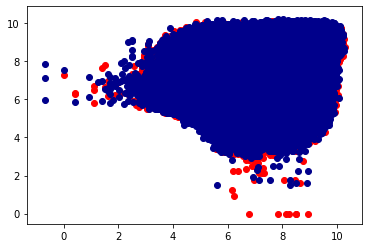

In [253]:
#log transform on both subsets
primarylog = primary.astype(float)
primarylog = primarylog.transform(np.log)

recurrentlog = recurrent.astype(float)
recurrentlog = recurrentlog.transform(np.log)

#methylated (y) vs unmethylated data (x) separating primary and recurrent sets

#primary tumors
plt.scatter(primarylog[0:22], primarylog[22:], c = 'red')

#recurrent tumors
plt.scatter(recurrentlog[0:25], recurrentlog[25:], c = 'darkblue')
